In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [114]:
survey= pd.read_excel('drive/My Drive/Sample Survey.xlsx')
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [115]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

2. How many samples were collected on each day?

In [116]:
print("Number of samples were collected on each day=",survey['collection_date'].value_counts())

Number of samples were collected on each day= 2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64


3. What proportion of the total respondents were aged less than 45?

In [117]:
survey.loc[survey['response_id'] == 124, 'age'] = '24'
survey['age']= survey['age'].astype('int')
below_45=survey[survey['age']<45]
proportion=(below_45.shape[0]/survey.shape[0])*100
print("proportion of the total respondents were aged less than 45 =",proportion)


proportion of the total respondents were aged less than 45 = 93.18479685452162


4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [118]:
bins = [18, 25, 40, 55, 120]
labels = ['18-25', '25-40', '40-55','55+']

survey['age_group'] = pd.cut(survey['age'] , bins, labels = labels,include_lowest = True)

In [119]:
survey['age_group'].value_counts()


25-40    3423
18-25    2692
40-55     644
55+       108
Name: age_group, dtype: int64

In [120]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [122]:
survey.tail()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,18-25
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25
6866,6867,2020-09-01,Rural,10th Pass,"₹ 5,000 - ₹ 10,000",JAP(L),JAP(L),Fully Satisfied,Fully Satisfied,33,Male,241,Gen,1.797518,25-40


5. How many samples were collected for each age-group? Which age-group had the most
samples?

In [123]:
print('Numbers of samples collected for each age-group =',survey['age_group'].value_counts())
print('25-40 Age-group have  most no. of samples =', survey['age_group'].value_counts().max())

Numbers of samples collected for each age-group = 25-40    3423
18-25    2692
40-55     644
55+       108
Name: age_group, dtype: int64
25-40 Age-group have  most no. of samples = 3423


6. What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?

In [124]:
RJD_voters=survey[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')]
RJD_voters.shape

(811, 15)

In [125]:
RJD_proportion=(RJD_voters.shape[0]/survey.shape[0])*100
print("proportion of the total respondents who had opted for the RJD party in both the Vote_Now and the Past_Vote =",RJD_proportion)

proportion of the total respondents who had opted for the RJD party in both the Vote_Now and the Past_Vote = 11.810106305519149


7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.

In [126]:
day_wise_vote = survey.groupby('collection_date').count()
day_wise_vote

,response_id,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
collection_date,,,,,,,,,,,,,,
2020-08-24,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479
2020-08-25,998,998,998,998,998,998,998,998,998,998,998,998,998,998
2020-08-26,598,598,598,598,598,598,598,598,598,598,598,598,598,598
2020-08-27,665,665,665,665,665,665,665,665,665,665,665,665,665,665
2020-08-28,761,761,761,761,761,761,761,761,761,761,761,761,761,761
2020-08-29,620,620,620,620,620,620,620,620,620,620,620,620,620,620
2020-08-30,582,582,582,582,582,582,582,582,582,582,582,582,582,582
2020-08-31,557,557,557,557,557,557,557,557,557,557,557,557,557,557
2020-09-01,607,607,607,607,607,607,607,607,607,607,607,607,607,607


In [145]:
Fully_Satisfied=survey[survey["CM_satisfaction"] == "Fully Satisfied"]
day_wise_fully_satisfied = Fully_Satisfied.groupby('collection_date').count()
day_wise_fully_satisfied_proportion= day_wise_fully_satisfied['CM_satisfaction']/day_wise_vote['CM_satisfaction']
print('Proportion of fully satisfied respondents for each day of sample collection = ',day_wise_fully_satisfied_proportion)

Proportion of fully satisfied respondents for each day of sample collection =  collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Name: CM_satisfaction, dtype: float64


8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis.

In [146]:
Fully_dissatisfied=survey[survey["MLA_satisfaction"] == "Fully Dissatisfied"]
day_wise_fully_dissatisfied = Fully_dissatisfied.groupby('collection_date').count()
day_wise_fully_dissatisfied_proportion= day_wise_fully_dissatisfied['MLA_satisfaction']/day_wise_vote['MLA_satisfaction']
print('Proportion of fully dissatisfied respondents for each day of sample collection = ',day_wise_fully_dissatisfied_proportion)

Proportion of fully dissatisfied respondents for each day of sample collection =  collection_date
2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Name: MLA_satisfaction, dtype: float64


Line Plot

(array([737661., 737662., 737663., 737664., 737665., 737666., 737667.,
        737668., 737669.]), <a list of 9 Text major ticklabel objects>)

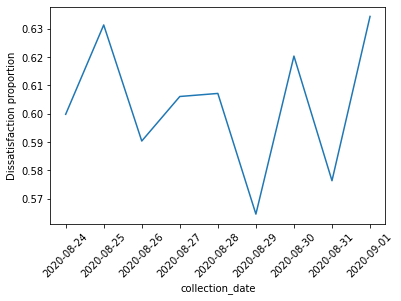

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
dissatisfaction= pd.DataFrame(day_wise_fully_dissatisfied_proportion)
dissatisfaction.rename(columns = {'MLA_satisfaction':'Dissatisfaction proportion'}, inplace = True)
sns.lineplot(data=dissatisfaction, x="collection_date", y="Dissatisfaction proportion")
plt.xticks(rotation=45)

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.

In [147]:
pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now')

age                        ...    weight                    
Vote_Now            AAP      AIMIM        BJP  ...      RLSP Undecided       VIP
Past_Vote                                      ...                              
BJP           24.857143  24.000000  32.112883  ...  0.779796  0.665919  1.869169
BSP                 NaN  27.000000  23.000000  ...       NaN       NaN       NaN
Did not vote  26.375000  24.400000  23.562771  ...  1.680529  0.710176  2.139310
HAM           24.000000        NaN  35.840000  ...       NaN  0.039564       NaN
INC                 NaN  26.166667  26.500000  ...  0.570149  1.222639       NaN
JAP(L)              NaN        NaN  29.750000  ...       NaN       NaN       NaN
JD(U)         32.500000  27.400000  31.181102  ...  1.775048  1.614940  3.445881
LJP                 NaN        NaN  33.710526  ...       NaN  1.709409       NaN
Left Front          NaN  22.000000  35.500000  ...  0.877960       NaN  3.020887
NOTA                NaN  24.000000  26.758621  ...  1.125669  0.314062       NaN
Others        26.000000  30.400000  31.288889  ...  3.800565  0.417463       NaN
RJD           30.000000  35.000000  30.913043  ...  1.075215  1.537365  3.290286
RLSP                NaN        NaN  33.941176  ...  1.958817  3.524302  8.258391
VIP                 NaN        NaN        NaN  ...       NaN       NaN  0.372959

[14 rows x 72 columns]

10. Repeat the above question with the cell values as the sum of “weight”.

In [148]:
pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now',values='weight', aggfunc='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.

In [150]:
age_group_grouping = survey.groupby('age_group').count()
age_group_grouping

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644
55+,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [151]:
age_group_grouping.all()

response_id         True
collection_date     True
urban_rural         True
education           True
income              True
Vote_Now            True
Past_Vote           True
CM_satisfaction     True
MLA_satisfaction    True
age                 True
gender              True
assembly_no         True
category            True
weight              True
dtype: bool

12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [159]:
jdu_opt= survey[survey["Vote_Now"] == "JD(U)"]
jdu_opt.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
13,14,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509,25-40
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,40-55
29,30,2020-08-24,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708,25-40
59,60,2020-08-24,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391,40-55


In [160]:
jdu_opt= survey[survey["Vote_Now"] == "JD(U)"]
jdu_age_group = jdu_opt.groupby('age_group').count()
jdu_age_group.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,216,216,216,216,216,216,216,216,216,216,216,216,216,216
25-40,245,245,245,245,245,245,245,245,245,245,245,245,245,245
40-55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
55+,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [158]:
jdu_age_group.all()

response_id         True
collection_date     True
urban_rural         True
education           True
income              True
Vote_Now            True
Past_Vote           True
CM_satisfaction     True
MLA_satisfaction    True
age                 True
gender              True
assembly_no         True
category            True
weight              True
dtype: bool

13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [177]:
Merged_dataframes = pd.merge(age_group_grouping, jdu_age_group, on=["age_group"])
Merged_dataframes

,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,gender_x,assembly_no_x,category_x,weight_x,response_id_y,collection_date_y,urban_rural_y,education_y,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-25,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,216,216,216,216,216,216,216,216,216,216,216,216,216,216
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,245,245,245,245,245,245,245,245,245,245,245,245,245,245
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644,55,55,55,55,55,55,55,55,55,55,55,55,55,55
55+,108,108,108,108,108,108,108,108,108,108,108,108,108,108,10,10,10,10,10,10,10,10,10,10,10,10,10,10
